In [2]:
import tensorflow as tf



In [3]:
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
#defining the parameters 
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  rotation_range=180,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#
x_train =train_datagen.flow_from_directory('C:/Users/nithi/OneDrive/Desktop/project ibm/Dataset/train_set',
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')


Found 458 images belonging to 2 classes.


In [6]:
x_test = test_datagen.flow_from_directory('C:/Users/nithi/OneDrive/Desktop/project ibm/Dataset/test_set',
                                       target_size=(150,150),
                                       batch_size=32,
                                       class_mode ='binary')

Found 122 images belonging to 2 classes.


In [7]:
x_test.class_indices

{'forest': 0, 'with fire': 1}

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')


In [21]:
model=Sequential()
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 128)     

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
r = model.fit(x_train,steps_per_epoch=15,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
15/15 [==============================] - 39s 3s/step - loss: 0.6358 - accuracy: 0.6703 - val_loss: 0.4178 - val_accuracy: 0.8361
Epoch 2/10
15/15 [==============================] - 19s 1s/step - loss: 0.4153 - accuracy: 0.8166 - val_loss: 0.3623 - val_accuracy: 0.8279
Epoch 3/10
15/15 [==============================] - 18s 1s/step - loss: 0.2042 - accuracy: 0.9061 - val_loss: 0.0325 - val_accuracy: 0.9918
Epoch 4/10
15/15 [==============================] - 19s 1s/step - loss: 0.2384 - accuracy: 0.9192 - val_loss: 0.1037 - val_accuracy: 0.9426
Epoch 5/10
15/15 [==============================] - 20s 1s/step - loss: 0.2067 - accuracy: 0.9148 - val_loss: 0.0519 - val_accuracy: 0.9754
Epoch 6/10
15/15 [==============================] - 20s 1s/step - loss: 0.1811 - accuracy: 0.9367 - val_loss: 0.0865 - val_accuracy: 0.9672
Epoch 7/10
15/15 [==============================] - 21s 1s/step - loss: 0.1658 - accuracy: 0.9410 - val_loss: 0.0386 - val_accuracy: 0.9918
Epoch 8/10
15/15 [==

In [30]:
model.save("forest1.h5")

In [39]:
from keras.models import load_model

In [40]:
from keras.preprocessing import image

In [42]:
import numpy as np

In [ ]:
import cv2

In [43]:
model=load_model("forest1.h5")


In [50]:
r = model.fit_generator(x_train,steps_per_epoch=15,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
15/15 [==============================] - 32s 2s/step - loss: 0.1483 - accuracy: 0.9520 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 18s 1s/step - loss: 0.1471 - accuracy: 0.9454 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 20s 1s/step - loss: 0.1321 - accuracy: 0.9454 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 20s 1s/step - loss: 0.1342 - accuracy: 0.9498 - val_loss: 0.0637 - val_accuracy: 0.9672
Epoch 5/10
15/15 [==============================] - 20s 1s/step - loss: 0.1701 - accuracy: 0.9454 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 20s 1s/step - loss: 0.1890 - accuracy: 0.9410 - val_loss: 0.0352 - val_accuracy: 0.9918
Epoch 7/10
15/15 [==============================] - 20s 1s/step - loss: 0.1151 - accuracy: 0.9563 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 8/10
15/15 [==

In [72]:
predictions = model.predict(x_train)
predictions = np.round(predictions)

15/15 [==============================] - 18s 1s/step


In [73]:
predictions = model.predict(x_test)
predictions = np.round(predictions)

4/4 [==============================] - 5s 1s/step


In [74]:
predictions


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [75]:
print(len(predictions))


122


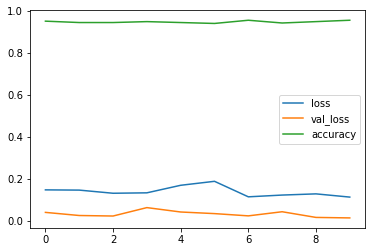

In [76]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

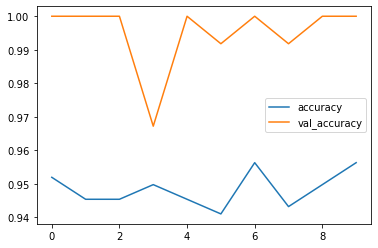

In [77]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [126]:
pip install utils 


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


In [127]:
from tensorflow.keras.utils import load_img

In [133]:
from keras_preprocessing.image import load_img

In [147]:
def predictImage(filename):
    img1 = load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

1/1 [==============================] - 0s 206ms/step
[[0.]]


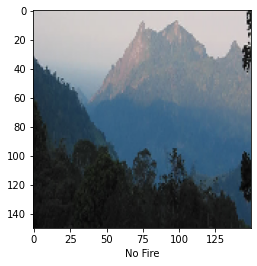

In [149]:
predictImage("C:/Users/nithi/OneDrive/Desktop/project ibm/Dataset/test_set/forest/easternArc.jpg")

1/1 [==============================] - 1s 817ms/step
[[1.]]


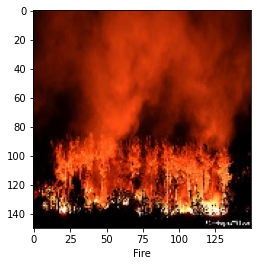

In [152]:
predictImage("C:/Users/nithi/OneDrive/Desktop/project ibm/Dataset/test_set/with fire/19464620_401.jpg")

In [95]:
pip install twilio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [153]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model


In [154]:
import os


In [155]:
 from twilio.rest import Client

In [162]:
from playsound import playsound

In [163]:
model = load_model(r'forest1.h5')

In [164]:
video = cv2.VideoCapture(0)

In [165]:
name = ['forest','with fire']

In [180]:
while(1):
    success, frame = video.read()
    cv2.imwrite("image.jpg",frame)
    img = load_img("image.jpg",target_size=(64,64))
    x = img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    pred =np.argmax(x,axis=1)
    p = pred[0]
    print(pred)
    cv2.putText(frame,'predicted class = ', (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)

[[[18 16 10]
  [19 18 45]
  [17 18 41]
  [17 59 59]
  [18 55 56]
  [16 50 51]
  [17 46 46]
  [17 43 44]
  [10 39 39]
  [24 34 35]
  [22 30 30]
  [23 24 25]
  [24 20  0]
  [23  1  0]
  [22  1  0]
  [21  1  0]
  [20  0  0]
  [13  0  0]
  [18 52 52]
  [17 49 49]
  [15 49 49]
  [11 44 46]
  [14 42 42]
  [14 14 14]
  [19 19 19]
  [ 7 11  7]
  [ 1  0  0]
  [ 4 15 15]
  [ 5 16 16]
  [ 6 17 17]
  [ 9  0  0]
  [10  0  0]
  [ 7  0  0]
  [ 7  0  0]
  [ 7  0  0]
  [ 1  0  1]
  [ 5  0  0]
  [ 0  0  0]
  [13  3  2]
  [12  1  1]
  [10  0  0]
  [ 9  0  0]
  [10  0  0]
  [ 9  1  1]
  [ 8  0  0]
  [ 7  0  0]
  [ 5  0  0]
  [ 5  0  0]
  [ 3  0  0]
  [ 2  0  0]
  [ 0  0  2]
  [ 0  0  0]
  [ 0  3  1]
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  2]
  [ 1  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  3]
  [ 0  0  1]
  [ 0  0  0]]]
[[[13 14  5]
  [11 19 45]
  [17 10  0]
  [18 61 60]
  [11 56 56]
  [12 51 51]
  [15 46 46]
  [12 44 44]
  [10 39 39]
  [11 34 34]
  [23 30 30]
  [21 24 24]
  [19 21 2

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [205]:
 pred =np.argmax(x,axis=1)
 if pred[0].all()==1:
        account_sid='AC73b617c990de0f236a076c8b62159383'
        auth_token='a61c60722933897f61a555b0a6d84b09'
        Client = Client(account_sid, auth_token)
        message= client.messages\
        .create(body="Forest fire is detected, stay alert and stay safe",
               from_= "+15134808332",
               to="8825499159")
        print(message.sid)
        print('Fire Detected')
        print('SMS SENT!')
        playsound('C:/Users/nithi/OneDrive/Desktop/project ibm/Melody Message.mp3')
 else:
    print('NO DANGER')
    #break
video.release()
cv2.destroyAllWindows()

    

NO DANGER
